In [189]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.preprocessing import LabelEncoder , OneHotEncoder

import seaborn as sns

In [148]:
train = pd.read_csv("train_loan.csv",index_col=None)
test  = pd.read_csv("test_loan.csv")

In [149]:
train.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [150]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [151]:
#FILLING MISSING VALUES IN THE Credit_History

train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].median())

In [152]:
#change the data type of the  credit_history
train['Credit_History'] = train['Credit_History'].astype('O')

In [153]:
#FILLING THE MISSING VALUES IN THE loan_Amount

train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [154]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [155]:
#checking for missing values

train.isnull().sum().sort_values(ascending = True)

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
Self_Employed        32
dtype: int64

In [156]:
train.dropna(inplace = True)

In [157]:
train.shape

(542, 13)

In [158]:
#train.drop('Loan_ID',axis = 1 , inplace =True)

In [159]:
train.duplicated().any()

False

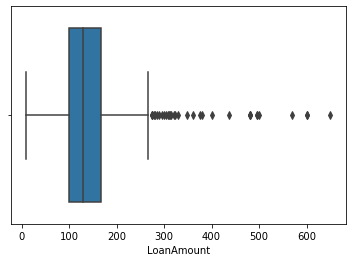

In [160]:
#visualize data 

sns.boxplot(train['LoanAmount'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


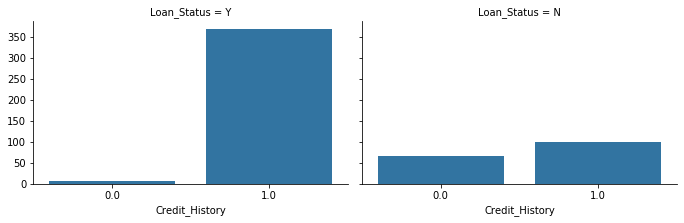

In [161]:
df = sns.FacetGrid(train,col = 'Loan_Status',size = 3.2 ,aspect = 1.5)
df.map(sns.countplot,'Credit_History')


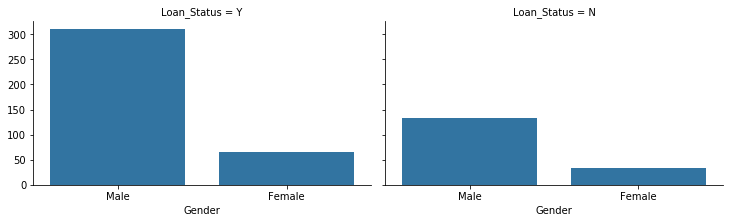

In [162]:
#Counter plot

c = sns.FacetGrid(train,col='Loan_Status',size = 3.2,aspect = 1.6)
c.map(sns.countplot , 'Gender')

##### here the male can get the loan more than the female

### Counter plot on basis of Education



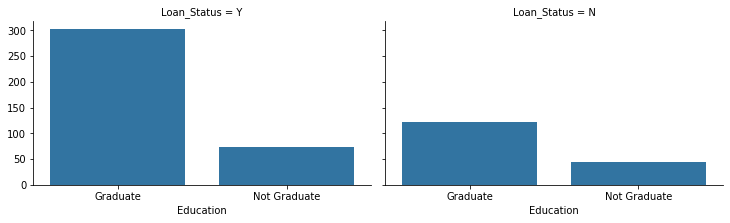

In [163]:
e = sns.FacetGrid(train,col='Loan_Status',size = 3.2 , aspect = 1.6)
e.map(sns.countplot , 'Education')

### the graduate get loan when prefer to the Non Graduate

## comparing the self employed 


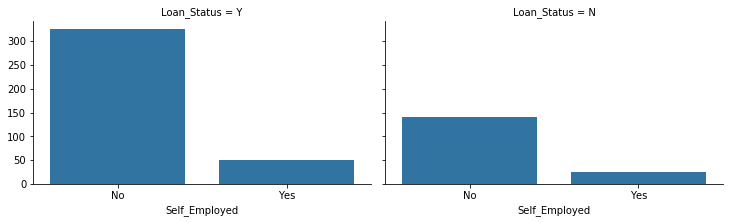

In [164]:
f = sns.FacetGrid(train,col = 'Loan_Status',size=3.2,aspect=1.6)
f.map(sns.countplot,'Self_Employed')

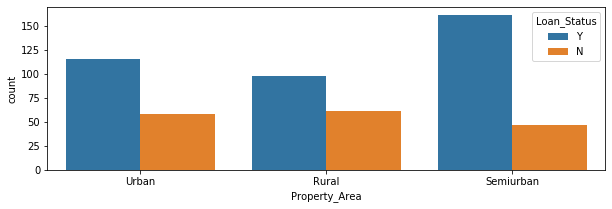

In [165]:
plt.figure(figsize=(10,3))
sns.countplot(x='Property_Area',hue='Loan_Status',data=train)

#This is a important feature

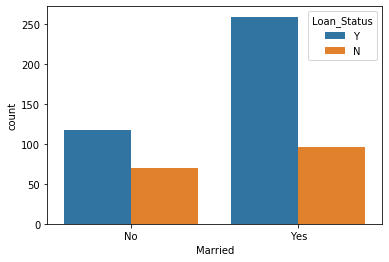

In [166]:
sns.countplot(x='Married',hue='Loan_Status',data = train)
#Married gets Loan rather than the unmarried

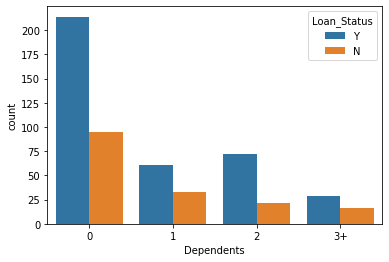

In [167]:
sns.countplot(x='Dependents',hue = 'Loan_Status',data = train)

In [168]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y


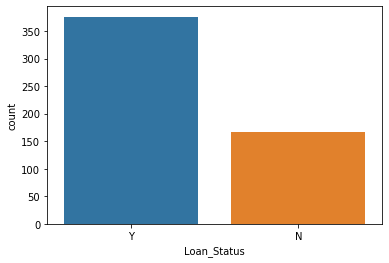

In [169]:
sns.countplot(train['Loan_Status'])

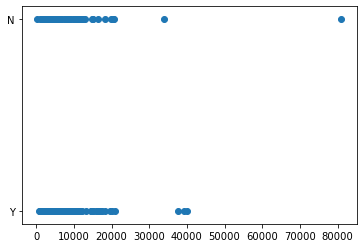

In [170]:
plt.scatter(train['ApplicantIncome'] , train['Loan_Status'])

In [171]:
train.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3911.5,0.0,133.5,360.0
Y,3823.5,1244.5,128.0,360.0


In [172]:
train.isnull().sum().sort_values(ascending = True)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [173]:
#Separate categorial and numerical data

num=[ ]

cat = [ ]

for i,j in enumerate(train.dtypes):
    if j == object:
        cat.append(train.iloc[:,i])
    else:
        num.append(train.iloc[:,i])

In [174]:
cat = pd.DataFrame(cat).transpose()

num = pd.DataFrame(num).transpose()

In [175]:
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,Y


In [176]:
cat = cat.apply(lambda x :x.fillna(x.value_counts().index[0]))

In [177]:
l = LabelEncoder()

In [178]:
#transform target data

target_val={"Y":1,"N":0}
target = train['Loan_Status']
train.drop(['Loan_Status'],axis = 1 , inplace = True)

In [179]:
target = target.map(target_val)

In [180]:
#perform encoding

for i in cat:
    cat[i] = l.fit_transform(cat[i])

In [181]:
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1,2,1
1,1,1,1,1,0,0,1,0,0
2,2,1,1,0,0,1,1,2,1
3,3,1,1,0,1,0,1,2,1
4,4,1,0,0,0,0,1,2,1


In [182]:
df = pd.concat([cat , num,target],axis =1)

In [183]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,0,1,0,0,0,0,1,2,1,5849.0,0.0,146.412162,360.0,1
1,1,1,1,1,0,0,1,0,0,4583.0,1508.0,128.000000,360.0,0
2,2,1,1,0,0,1,1,2,1,3000.0,0.0,66.000000,360.0,1
3,3,1,1,0,1,0,1,2,1,2583.0,2358.0,120.000000,360.0,1
4,4,1,0,0,0,0,1,2,1,6000.0,0.0,141.000000,360.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,537,0,0,0,0,0,1,0,1,2900.0,0.0,71.000000,360.0,1
610,538,1,1,3,0,0,1,0,1,4106.0,0.0,40.000000,180.0,1
611,539,1,1,1,0,0,1,2,1,8072.0,240.0,253.000000,360.0,1
612,540,1,1,2,0,0,1,2,1,7583.0,0.0,187.000000,360.0,1


In [199]:
# TRAIN THE DATA
X = pd.concat([cat , num ],axis = 1)

Y = target


In [200]:
#SPLITTING THE DATA 

X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 42)

In [201]:
log = LogisticRegression()
log.fit(X_train,Y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
log.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [204]:
print(cross_val_score(log,x,y,cv=3))

[1.         0.99444444 1.        ]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [220]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
#print('ratio of target in original_data :',train['Loan_Status'].value_counts().values/ len(train))

X_train shape (433, 13)
y_train shape (433,)
X_test shape (109, 13)
y_test shape (109,)

ratio of target in y_train : [0.69284065 0.30715935]
ratio of target in y_test : [0.69724771 0.30275229]


In [221]:
#Functions

from sklearn.metrics import precision_score , log_loss , accuracy_score , f1_score , recall_score 

In [222]:

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [223]:
def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [224]:
def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------
KNeighborsClassifier :
  pre: 0.766
  rec: 0.907
  f1: 0.831
  loss: 8.854
  acc: 0.744
------------------------------
SVC :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------
DecisionTreeClassifier :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [225]:
X_train.shape

(433, 13)

In [226]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

 pre     1.000000e+00
 rec     1.000000e+00
 f1      1.000000e+00
 loss    9.992007e-16
 acc     1.000000e+00
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/ju

 pre      0.709048
 rec      0.850000
 f1       0.772202
 loss    11.966456
 acc      0.653541
Name: 0, dtype: float64
------------------------------
SVC :


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: 

 pre      0.692918
 rec      1.000000
 f1       0.818586
 loss    10.606498
 acc      0.692918
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     1.000000e+00
 rec     1.000000e+00
 f1      1.000000e+00
 loss    9.992007e-16
 acc     1.000000e+00
Name: 0, dtype: float64
------------------------------


In [227]:

x = []
idx = [' pre', ' rec', ' f1', ' loss', ' acc']

# we will use one model
log = LogisticRegression()

for train, test in skf.split(X_train, y_train):
    log.fit(X_train.iloc[train], y_train.iloc[train])
    ls = loss(y_train.iloc[test], log.predict(X_train.iloc[test]), retu=True)
    x.append(ls)
    
# thats what we get
pd.DataFrame(x, columns=idx)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

,pre,rec,f1,loss,acc
0,1.0,1.0,1.0,9.992007e-16,1.0
1,1.0,1.0,1.0,9.992007e-16,1.0
2,1.0,1.0,1.0,9.992007e-16,1.0
3,1.0,1.0,1.0,9.992007e-16,1.0
4,1.0,1.0,1.0,9.992007e-16,1.0
5,1.0,1.0,1.0,9.992007e-16,1.0
6,1.0,1.0,1.0,9.992007e-16,1.0
7,1.0,1.0,1.0,9.992007e-16,1.0
8,1.0,1.0,1.0,9.992007e-16,1.0
9,1.0,1.0,1.0,9.992007e-16,1.0
